In [43]:
# Gold Price Prediction
# Here we are going to predict the price of gold using several available data
# The model we are going to use here is RandomForestRegressor

# Here we are predicting the price of gold with other currency pair or commodities.
# The instruments we have here are Silver, Spx, United States Oil price and EURUSD

# A note : Here we are not forecasting, forcasting is a seperate problem.
# We will look at forecasting later. For forecasting we will use LSTM long-short-term memory.

# Also here we will look at a new way to test our data, here we will try to visualize the price predicted by our model to the actual price.
# As you can see (at the end) we have predicted the price correct for about 99% which is really good
# Here we have data for 10 years so let's begin

In [23]:
# importing all the dependencies.

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the datasets

a = pd.read_csv('/content/drive/MyDrive/ML Datasets/gold-price.csv')
gold = pd.DataFrame(a)

In [7]:
# Dropping the columns that we dont need

gold = gold.drop(columns='Date')

In [8]:
gold

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [9]:
# Looking at some information about the dataset

gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [10]:
# Looking at the stastical measures of the data

gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# Finding the correlation between all the data

correlation = gold.corr()

<Axes: >

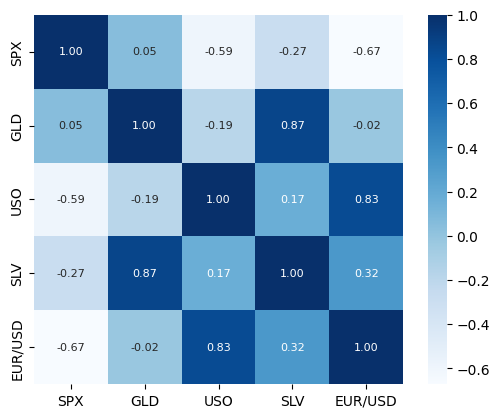

In [12]:
# Here we can see that gold and silver are positively correlated

sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={'size':8}, fmt='.2f', cmap='Blues')

In [13]:
# If you can't understand the diagram above for some reason, print the info by

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-2c7584433b20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

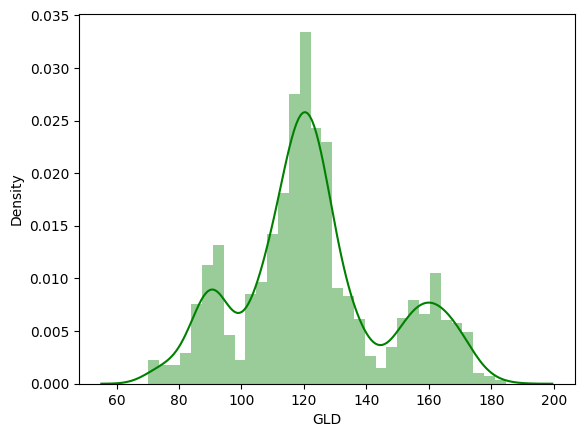

In [15]:
# Looking at the distribution of gold values

sns.distplot(gold['GLD'], color='green')

# Here we can see most values lie in the range of 120 and less around 60 & 180

In [17]:
# Splitting the data

X = gold.drop(columns='GLD')

In [19]:
Y = gold['GLD']

In [21]:
# Splitting the data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [22]:
# Looking at the data distribution after splitting

print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [24]:
# Standardizing our data

scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [30]:
# Standard Deviation for both are close to 1 which is awesome

X_train.std()

0.9999999999999999

In [31]:
X_test.std()

1.0301741774855417

In [32]:
# Importing our model

model = RandomForestRegressor(n_estimators=100)

In [33]:
# Fittting our data

model.fit(X_train, Y_train)

RandomForestRegressor()

In [35]:
# Predicting

X_train_prediction = model.predict(X_train)
r_squared = metrics.r2_score(Y_train, X_train_prediction)

print(r_squared)

0.9984582307438422


In [36]:
X_test_prediction = model.predict(X_test)
r_squared = metrics.r2_score(Y_test, X_test_prediction)

print(r_squared)

0.9893101350593989


In [38]:
# Converting Y_test into list

Y_test = list(Y_test)

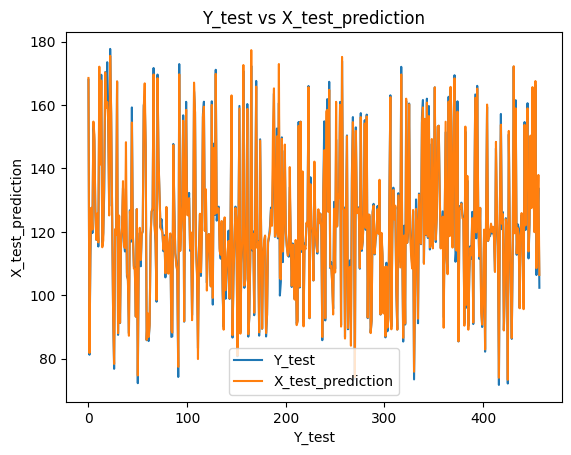

In [42]:
# Here we are only plotting for Y_test cause testing is more important than training.

plt.plot(Y_test, label='Y_test')
plt.plot(X_test_prediction, label='X_test_prediction')
plt.title('Y_test vs X_test_prediction')
plt.xlabel('Y_test')
plt.ylabel('X_test_prediction')
plt.legend()

In [ ]:
# Above we can seee that we have predicted correct values 99% of time.
# What we did above is place X_test_prediction on top of Y_test.